<a href="https://colab.research.google.com/github/pathilink/alura_time_series/blob/main/notebook/1_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucar - Sales

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

from pandas.plotting import autocorrelation_plot

In [2]:
print(sns.__version__) 

0.11.2


## Data

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_sales = pd.read_csv("drive/MyDrive/Alura/Time Series/alucar.csv")
df_sales.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
# Rename columns

df_sales.rename(columns={'mes': 'month', 'vendas': 'sales'}, inplace=True)

In [6]:
print(f'Shape: {df_sales.shape[0]} rows and {df_sales.shape[1]} columns.')

Shape: 24 rows and 2 columns.


In [7]:
print('Number of null data:')
df_sales.isna().sum()#.sum()

Number of null data:


month    0
sales    0
dtype: int64

In [8]:
print('Variable types:') 
df_sales.dtypes

Variable types:


month    object
sales     int64
dtype: object

In [9]:
# Convert object column to datetime

df_sales['month'] = pd.to_datetime(df_sales['month'])
df_sales.dtypes

month    datetime64[ns]
sales             int64
dtype: object

## Dataviz

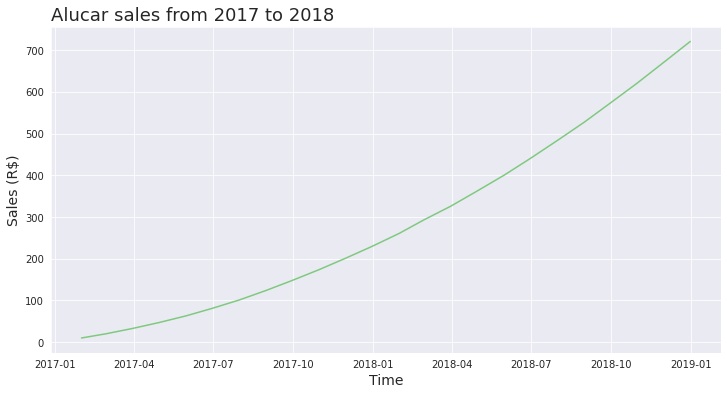

In [10]:
# Sales increase over time

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='month', y='sales', data=df_sales)
ax.figure.set_size_inches(12, 6)
ax.set_title('Alucar sales from 2017 to 2018', loc='left', fontsize=18)
ax.set_xlabel('Time', fontsize = 14)
ax.set_ylabel('Sales (R$)', fontsize = 14)
ax = ax

### Decomposing

In [11]:
df_sales['increase'] = df_sales['sales'].diff()
df_sales.head()

,month,sales,increase
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [12]:
def plot_function(title, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=df_sales)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(title, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

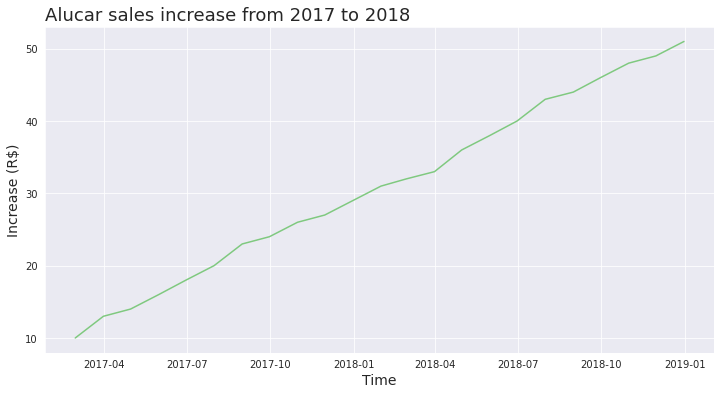

In [13]:
# Decomposition of the increase value

plot_function(
    title='Alucar sales increase from 2017 to 2018', 
    labelx='Time', 
    labely='Increase (R$)', 
    x='month', 
    y='increase', 
    dataset=df_sales
    )

In [14]:
df_sales['acceleration'] = df_sales['increase'].diff()
df_sales.head()

,month,sales,increase,acceleration
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


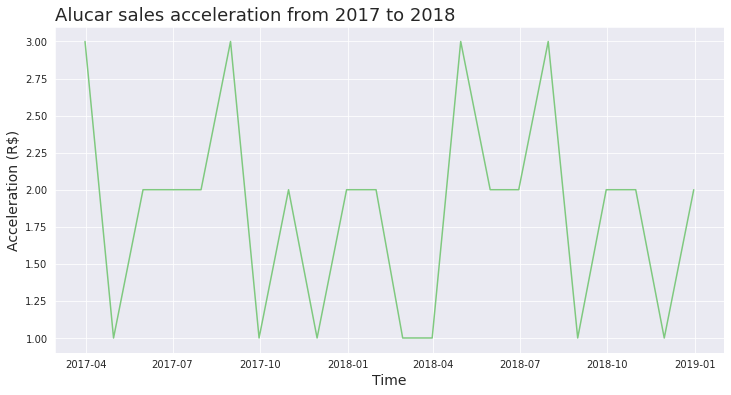

In [15]:
# Acceleration: decomposition of the increase
## No negative acceleration occurred

plot_function(
    'Alucar sales acceleration from 2017 to 2018', 
    'Time', 
    'Acceleration (R$)', 
    'month', 
    'acceleration', 
    df_sales
    )

In [16]:
def plot_comparison(x, y1, y2, y3, dataset, title1, title2, title3):
  plt.figure(figsize=(16, 16))

  ax1 = plt.subplot(3, 1, 1) # (number of graphs, number of parts, order of graphs)
  ax1.set_title(title1, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  
  ax2 = plt.subplot(3, 1, 2)
  ax2.set_title(title2, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y2, data=dataset)


  ax3 = plt.subplot(3, 1, 3)
  ax3.set_title(title3, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y3, data=dataset)
  # ax1 = ax1
  # ax2 = ax2
  # ax3 = ax3

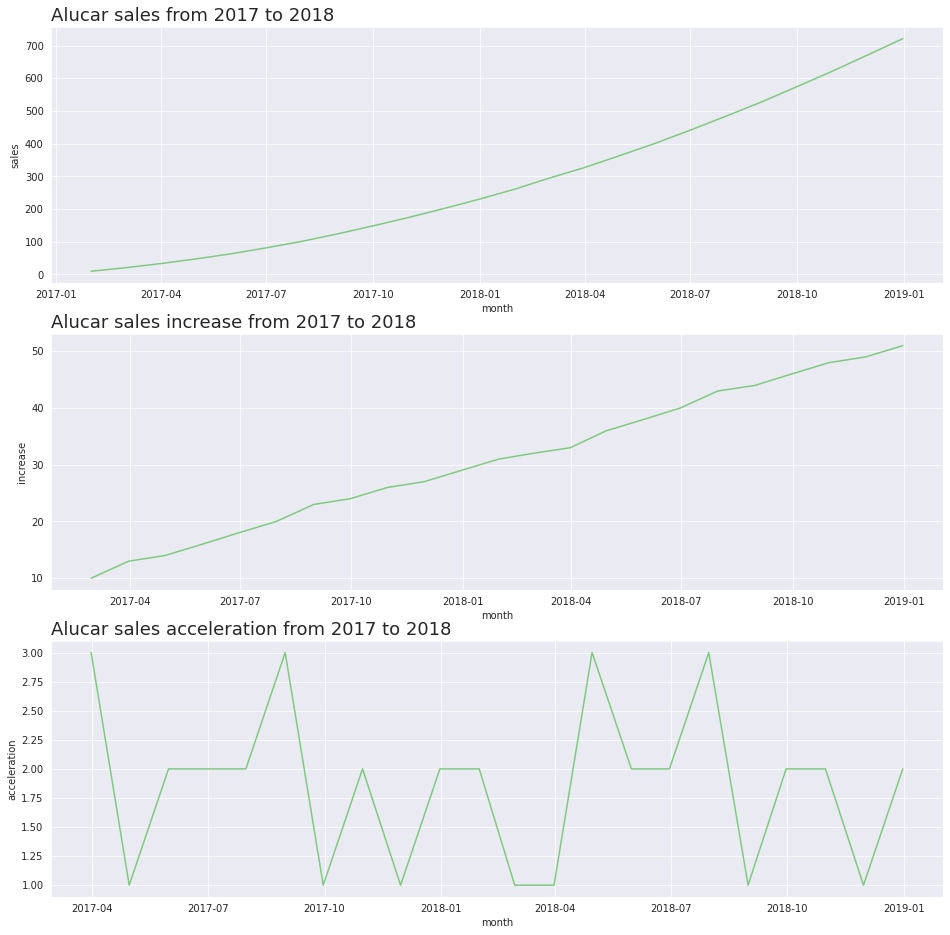

In [17]:
plot_comparison(
    'month', 
    'sales', 
    'increase', 
    'acceleration', 
    df_sales, 
    'Alucar sales from 2017 to 2018',
    'Alucar sales increase from 2017 to 2018',
    'Alucar sales acceleration from 2017 to 2018'
    )

### [Autocorrelation](https://pt.wikipedia.org/wiki/Autocorrela%C3%A7%C3%A3o)

| Autocorrelation | Interpretation |
|:--|:--|
| 1 | Perfect positive correlation |
| 0.7 to 0.9 | Strong correlation |
| 0.4 to 0.7 | Moderate correlation |
| 0.2 to 0.4 | Poor correlation |
| 0 | Null correlation |
| < 0 | Negative correlation |
| -1 | Perfect negative correlation |

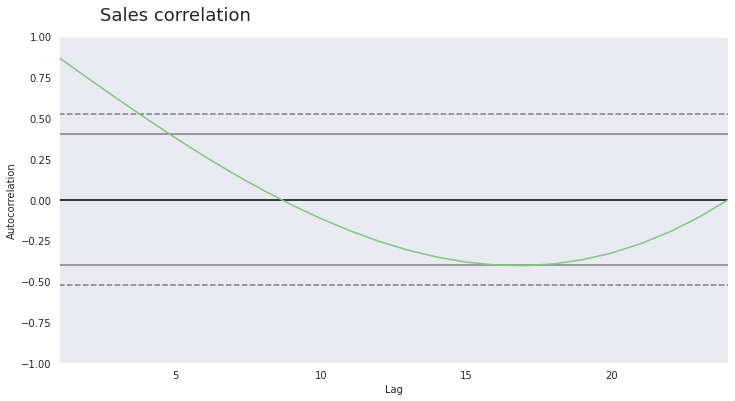

In [18]:
# Autocorrelation: measure of correlation between observations in a time series
##  First 7 days have correlation 

ax = plt.figure(figsize=(12,6))
ax.suptitle('Sales correlation', fontsize=18, x=0.26, y=0.95) 
autocorrelation_plot(df_sales['sales'])
ax=ax


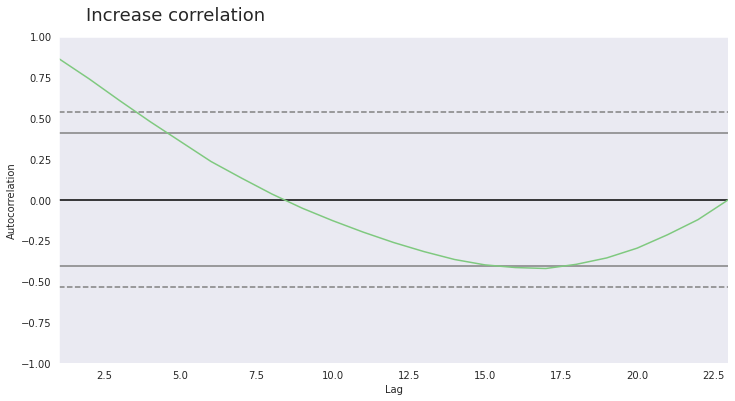

In [19]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Increase correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sales['increase'][1:]) # index from which there are values in the dataset
ax=ax

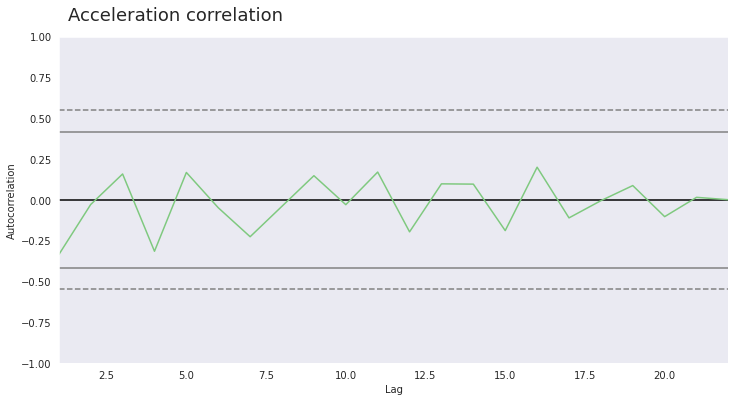

In [20]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Acceleration correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sales['acceleration'][2:]) # index from which there are values in the dataset
ax=ax